In [1]:
from data_functions import *

In [4]:
KCHOL = pd.read_csv('./Data/Turkey - Koc Holding AS (KCHOL).csv')
KCHOL

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",19.41,19.42,19.63,19.27,13.14M,-0.46%
1,"Mar 30, 2021",19.5,19.12,19.81,19.03,21.05M,2.09%
2,"Mar 29, 2021",19.1,19.24,19.67,19.1,16.56M,-0.78%
3,"Mar 26, 2021",19.25,20.28,20.36,19.1,21.35M,-3.85%
4,"Mar 25, 2021",20.02,20.5,20.86,20.02,15.93M,-1.48%
...,...,...,...,...,...,...,...
311,"Jan 07, 2020",19.93,20.22,20.28,19.92,2.89M,-0.75%
312,"Jan 06, 2020",20.08,20.34,20.34,19.97,1.94M,-1.08%
313,"Jan 03, 2020",20.3,20.3,20.44,19.97,3.31M,-0.39%
314,"Jan 02, 2020",20.38,20.42,20.44,20.24,2.53M,0.30%


In [5]:
KCHOL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      316 non-null    object
 1   Price     316 non-null    object
 2   Open      316 non-null    object
 3   High      316 non-null    object
 4   Low       316 non-null    object
 5   Vol.      315 non-null    object
 6   Change %  315 non-null    object
dtypes: object(7)
memory usage: 17.4+ KB


In [6]:
## drop last row because it doesn't contain relevant information

KCHOL.drop(315, inplace=True)

In [8]:
## change date column to datetime

KCHOL['Date'] = pd.to_datetime(KCHOL['Date'], format='%b %d, %Y')

In [9]:
## change price columns to integer

KCHOL['Price'] = KCHOL['Price'].astype(float)
KCHOL['Open'] = KCHOL['Open'].astype(float)
KCHOL['High'] = KCHOL['High'].astype(float)
KCHOL['Low'] = KCHOL['Low'].astype(float)

In [10]:
KCHOL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      315 non-null    datetime64[ns]
 1   Price     315 non-null    float64       
 2   Open      315 non-null    float64       
 3   High      315 non-null    float64       
 4   Low       315 non-null    float64       
 5   Vol.      315 non-null    object        
 6   Change %  315 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 19.7+ KB


In [11]:
KCHOL.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
KCHOL

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,20.38,20.42,20.44,20.24,2.53M,0.30%
1,2020-01-03,20.30,20.30,20.44,19.97,3.31M,-0.39%
2,2020-01-06,20.08,20.34,20.34,19.97,1.94M,-1.08%
3,2020-01-07,19.93,20.22,20.28,19.92,2.89M,-0.75%
4,2020-01-08,19.94,19.89,19.95,19.66,2.79M,0.05%
...,...,...,...,...,...,...,...
310,2021-03-25,20.02,20.50,20.86,20.02,15.93M,-1.48%
311,2021-03-26,19.25,20.28,20.36,19.10,21.35M,-3.85%
312,2021-03-29,19.10,19.24,19.67,19.10,16.56M,-0.78%
313,2021-03-30,19.50,19.12,19.81,19.03,21.05M,2.09%


In [12]:
## find rows for 2021 data

KCHOL.loc[KCHOL['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
252,2021-01-04,21.20,21.12,21.50,21.04,10.53M,0.38%
253,2021-01-05,21.14,21.00,21.60,20.86,15.65M,-0.28%
254,2021-01-06,21.14,21.24,21.34,20.86,12.23M,0.00%
255,2021-01-07,21.10,21.20,21.26,20.88,7.91M,-0.19%
256,2021-01-08,21.52,21.22,21.52,21.12,10.36M,1.99%
...,...,...,...,...,...,...,...
310,2021-03-25,20.02,20.50,20.86,20.02,15.93M,-1.48%
311,2021-03-26,19.25,20.28,20.36,19.10,21.35M,-3.85%
312,2021-03-29,19.10,19.24,19.67,19.10,16.56M,-0.78%
313,2021-03-30,19.50,19.12,19.81,19.03,21.05M,2.09%


In [21]:
## split training data and testing data, testing data will be the year of 2021

training_data = KCHOL[['Date', 'Price']][:255]
testing_data = KCHOL[['Date', 'Price']][255:]

In [22]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(KCHOL[['Price']])
scaled_train_data = scaled_data[:255]

In [23]:
len(training_data)

255

In [24]:
len(testing_data)

60

# PyTorch
## Daily

In [53]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(KCHOL, testing_data, scaler, 14)

In [54]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [55]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [56]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.20975175499916077
Epoch  1 MSE:  0.060346513986587524
Epoch  2 MSE:  0.16485120356082916
Epoch  3 MSE:  0.03118157759308815
Epoch  4 MSE:  0.05205230414867401
Epoch  5 MSE:  0.06945966929197311
Epoch  6 MSE:  0.07462149858474731
Epoch  7 MSE:  0.07174652814865112
Epoch  8 MSE:  0.06438538432121277
Epoch  9 MSE:  0.05497292801737785
Epoch  10 MSE:  0.04540600627660751
Epoch  11 MSE:  0.03748292103409767
Epoch  12 MSE:  0.03302016109228134
Epoch  13 MSE:  0.03334419056773186
Epoch  14 MSE:  0.03761788457632065
Epoch  15 MSE:  0.041555047035217285
Epoch  16 MSE:  0.04157629981637001
Epoch  17 MSE:  0.038313183933496475
Epoch  18 MSE:  0.034370556473731995
Epoch  19 MSE:  0.031534358859062195
Epoch  20 MSE:  0.030225107446312904
Epoch  21 MSE:  0.03007778711616993
Epoch  22 MSE:  0.030494557693600655
Epoch  23 MSE:  0.030923185870051384
Epoch  24 MSE:  0.0309588760137558
Epoch  25 MSE:  0.03036757931113243
Epoch  26 MSE:  0.029074735939502716
Epoch  27 MSE:  0.027138277888

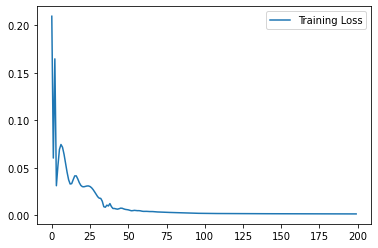

In [57]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [58]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.44 RMSE
Test Score: 0.60 RMSE


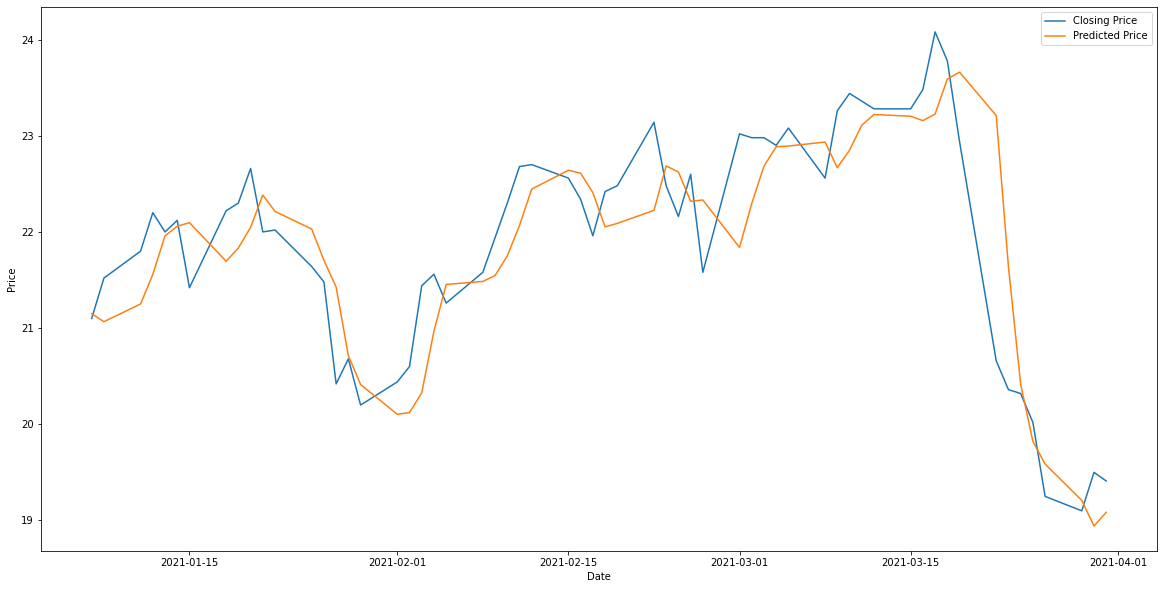

In [59]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [60]:
boll_daily = KCHOL[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 9)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 9)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_528/204083245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_528/204083245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 9)
C:\Users\Chris\AppData\Local\Temp/ipykernel_528/204083245.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,20.380000,NaN,NaN,NaN
1,2020-01-03,20.300000,NaN,NaN,NaN
2,2020-01-06,20.080000,NaN,NaN,NaN
3,2020-01-07,19.930000,NaN,NaN,NaN
4,2020-01-08,19.940000,NaN,NaN,NaN
...,...,...,...,...,...
310,2021-03-25,19.822195,22.436193,25.326762,19.545625
311,2021-03-26,19.586346,22.034324,25.410021,18.658627
312,2021-03-29,19.208344,21.595545,25.322668,17.868422
313,2021-03-30,18.941206,21.119510,25.001011,17.238009


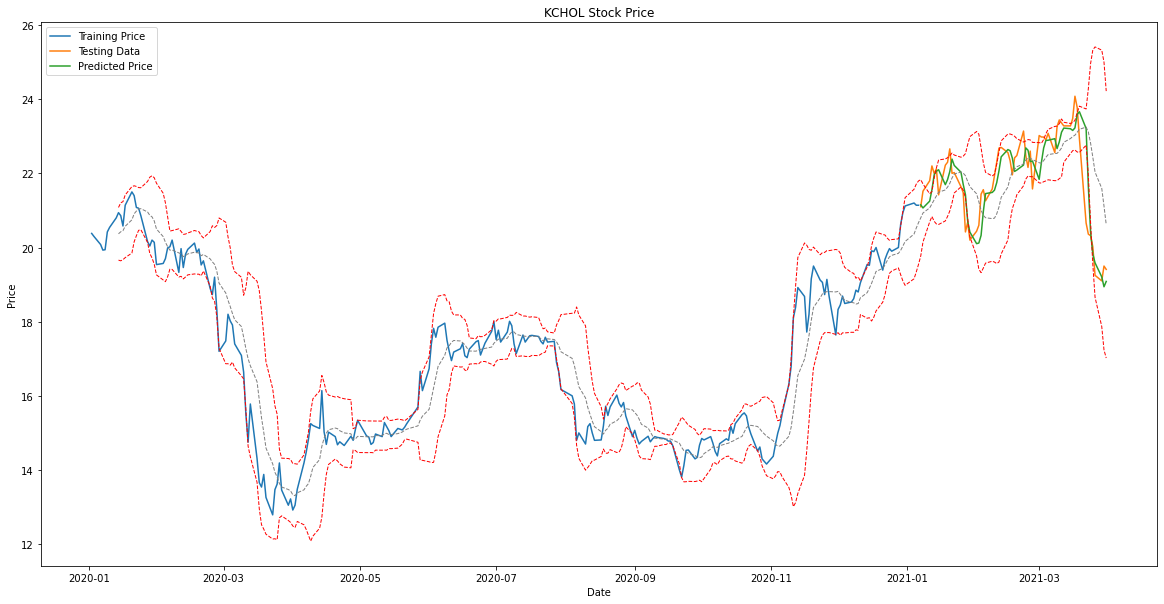

In [61]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KCHOL Stock Price')
plt.legend()
plt.show()

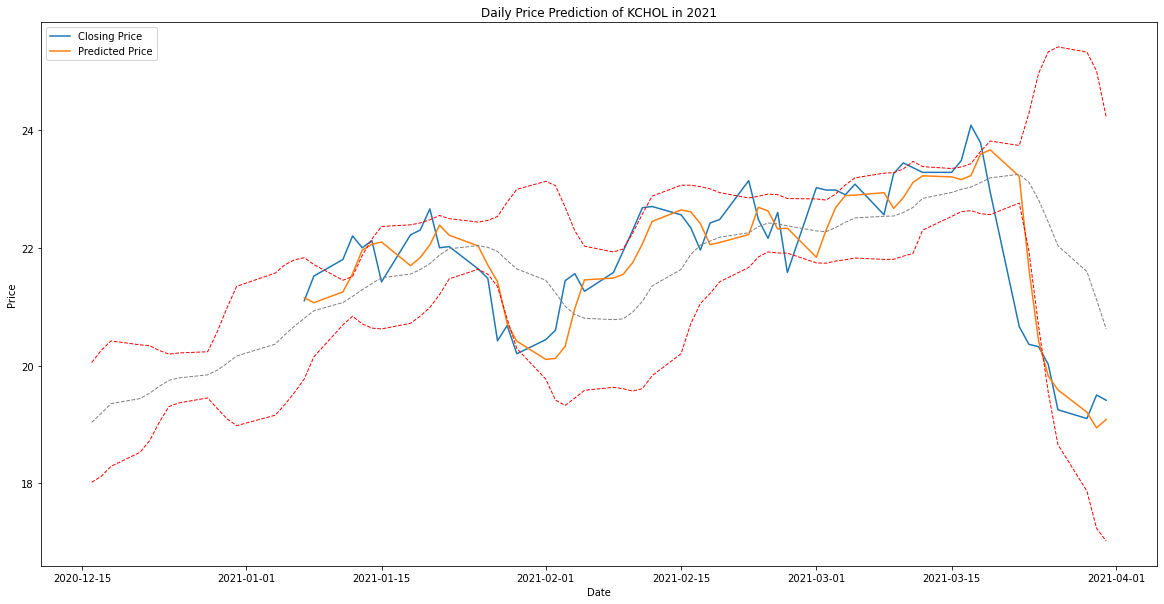

In [62]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][240:], boll_daily['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of KCHOL in 2021')
plt.legend()
plt.show()

## Weekly

In [70]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [71]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(KCHOL, testing_data, scaler, 15)

In [72]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [73]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.1341390609741211
Epoch  1 MSE:  0.07531873136758804
Epoch  2 MSE:  0.03917669504880905
Epoch  3 MSE:  0.07075730711221695
Epoch  4 MSE:  0.03496458753943443
Epoch  5 MSE:  0.04328008368611336
Epoch  6 MSE:  0.0485403947532177
Epoch  7 MSE:  0.047876063734292984
Epoch  8 MSE:  0.043933890759944916
Epoch  9 MSE:  0.039018239825963974
Epoch  10 MSE:  0.03491274267435074
Epoch  11 MSE:  0.03298023343086243
Epoch  12 MSE:  0.03363439068198204
Epoch  13 MSE:  0.03524833545088768
Epoch  14 MSE:  0.035007841885089874
Epoch  15 MSE:  0.032625745981931686
Epoch  16 MSE:  0.030056057497859
Epoch  17 MSE:  0.02856002189218998
Epoch  18 MSE:  0.027906622737646103
Epoch  19 MSE:  0.02689204178750515
Epoch  20 MSE:  0.023944513872265816
Epoch  21 MSE:  0.018212702125310898
Epoch  22 MSE:  0.016450293362140656
Epoch  23 MSE:  0.016087789088487625
Epoch  24 MSE:  0.011887133121490479
Epoch  25 MSE:  0.0159462820738554
Epoch  26 MSE:  0.01387873850762844
Epoch  27 MSE:  0.01179818902164

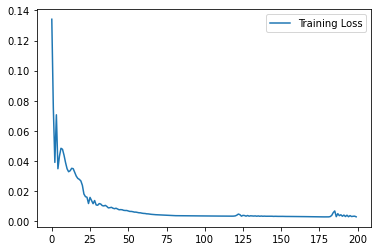

In [74]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [75]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.68 RMSE
Test Score: 21.09 RMSE


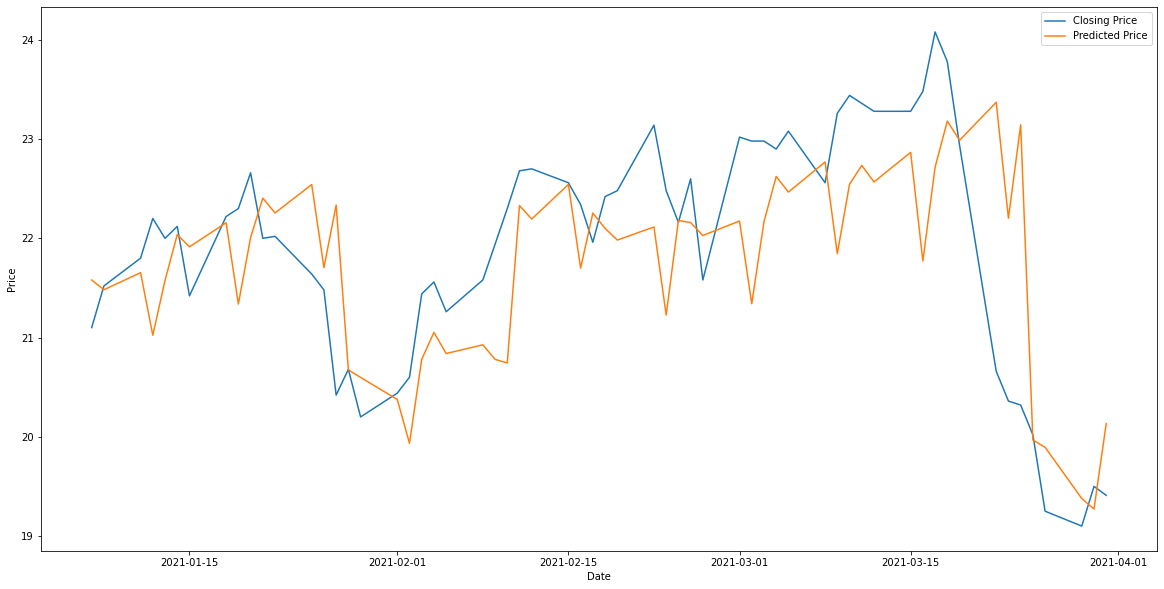

In [76]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [77]:
boll_weekly = KCHOL[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 10)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_528/983409030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_528/983409030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_528/983409030.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,20.380000,NaN,NaN,NaN
1,2020-01-03,20.300000,NaN,NaN,NaN
2,2020-01-06,20.080000,NaN,NaN,NaN
3,2020-01-07,19.930000,NaN,NaN,NaN
4,2020-01-08,19.940000,NaN,NaN,NaN
...,...,...,...,...,...
310,2021-03-25,19.967192,22.477512,24.487612,20.467412
311,2021-03-26,19.894135,22.210105,24.795679,19.624532
312,2021-03-29,19.377695,21.861280,24.946536,18.776024
313,2021-03-30,19.271984,21.611404,25.106746,18.116062


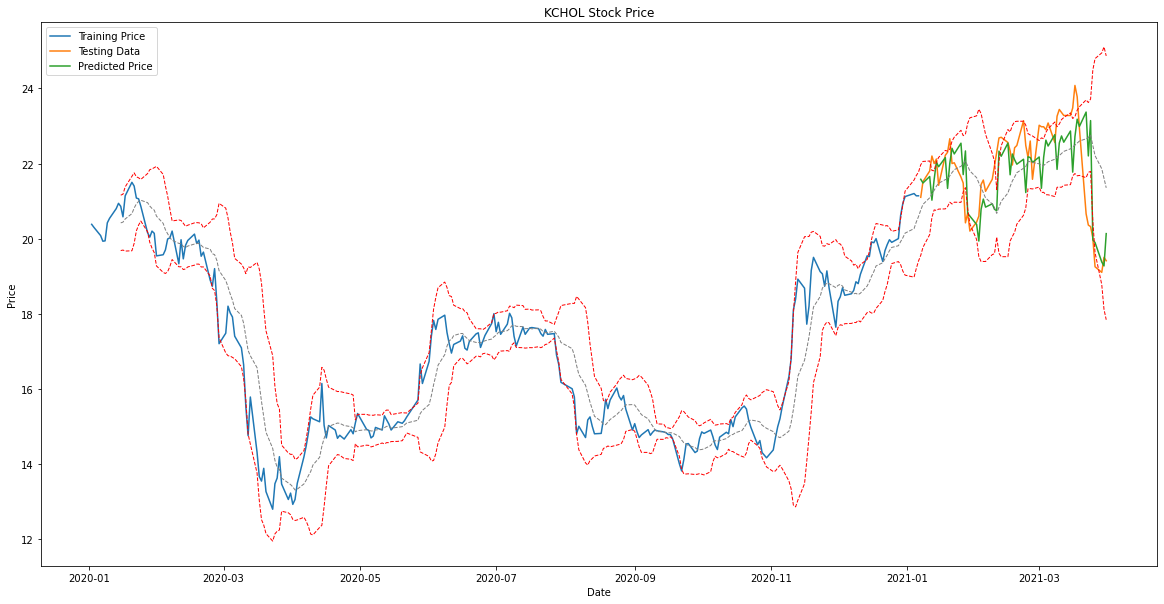

In [78]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KCHOL Stock Price')
plt.legend()
plt.show()

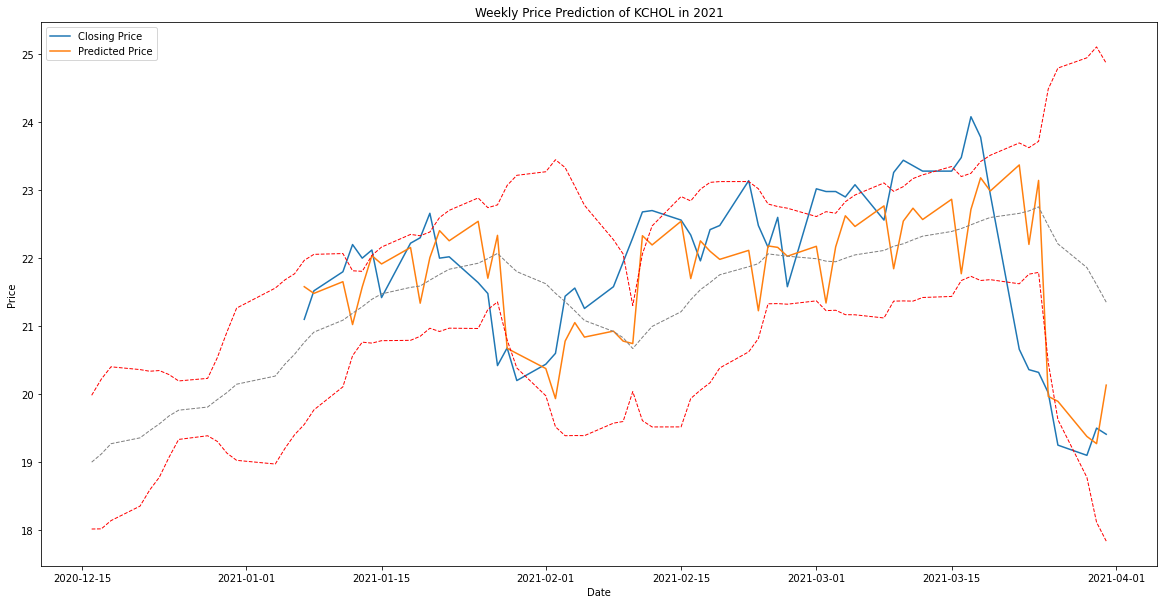

In [79]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][240:], boll_weekly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of KCHOL in 2021')
plt.legend()
plt.show()

# Monthly

In [80]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [86]:
scaled_train_data_m = scaled_data[:250]

In [87]:
len(scaled_train_data_m)

250

In [101]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data_m, 30)
X_test_m, y_test_m = get_monthly_test_data(KCHOL, testing_data, scaler, 30)

In [102]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [103]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.11532951146364212
Epoch  1 MSE:  0.07787526398897171
Epoch  2 MSE:  0.03934939578175545
Epoch  3 MSE:  0.18994054198265076
Epoch  4 MSE:  0.03113974817097187
Epoch  5 MSE:  0.03994973003864288
Epoch  6 MSE:  0.051763951778411865
Epoch  7 MSE:  0.055784616619348526
Epoch  8 MSE:  0.054897088557481766
Epoch  9 MSE:  0.05109502002596855
Epoch  10 MSE:  0.04551589861512184
Epoch  11 MSE:  0.03905265033245087
Epoch  12 MSE:  0.032990697771310806
Epoch  13 MSE:  0.029869182035326958
Epoch  14 MSE:  0.032728053629398346
Epoch  15 MSE:  0.03425232321023941
Epoch  16 MSE:  0.03135543316602707
Epoch  17 MSE:  0.02831176668405533
Epoch  18 MSE:  0.027110788971185684
Epoch  19 MSE:  0.027322912588715553
Epoch  20 MSE:  0.028054166585206985
Epoch  21 MSE:  0.02869652397930622
Epoch  22 MSE:  0.028977125883102417
Epoch  23 MSE:  0.028857465833425522
Epoch  24 MSE:  0.02843320369720459
Epoch  25 MSE:  0.027858849614858627
Epoch  26 MSE:  0.02729286253452301
Epoch  27 MSE:  0.02685519

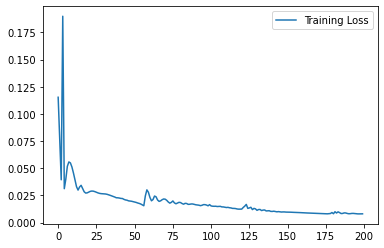

In [104]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [105]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.93 RMSE
Test Score: 18.42 RMSE


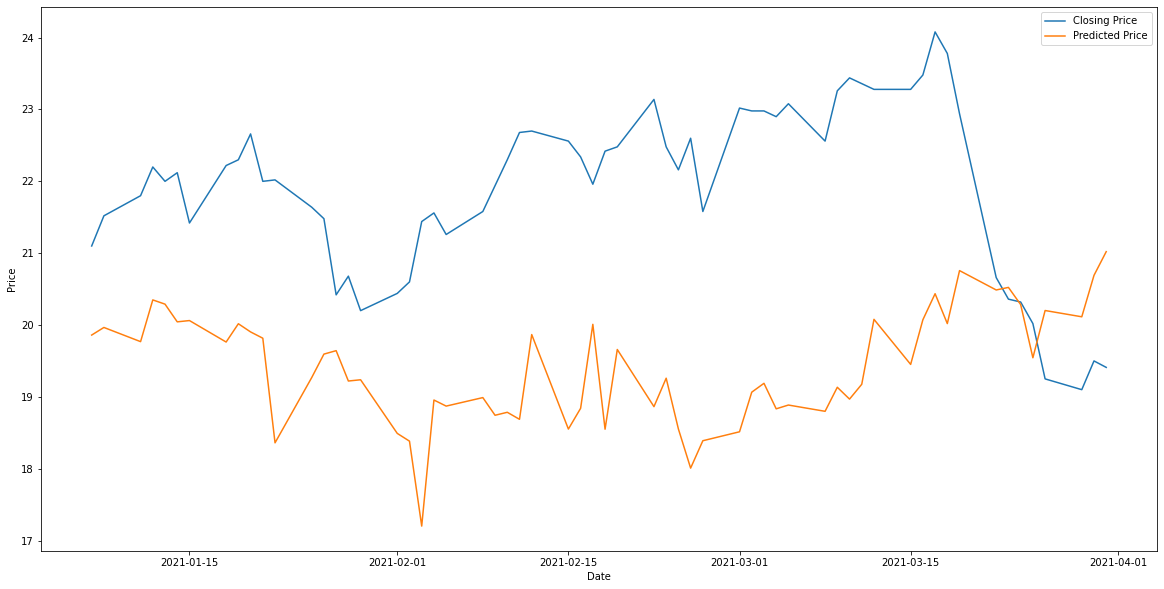

In [106]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [107]:
boll_monthly = KCHOL[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 10)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_528/3932728401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_528/3932728401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_528/3932728401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,20.380000,NaN,NaN,NaN
1,2020-01-03,20.300000,NaN,NaN,NaN
2,2020-01-06,20.080000,NaN,NaN,NaN
3,2020-01-07,19.930000,NaN,NaN,NaN
4,2020-01-08,19.940000,NaN,NaN,NaN
...,...,...,...,...,...
310,2021-03-25,19.544111,20.165586,21.009535,19.321637
311,2021-03-26,20.201660,20.177871,21.019780,19.335962
312,2021-03-29,20.114437,20.244150,20.919928,19.568372
313,2021-03-30,20.691378,20.306011,21.024000,19.588023


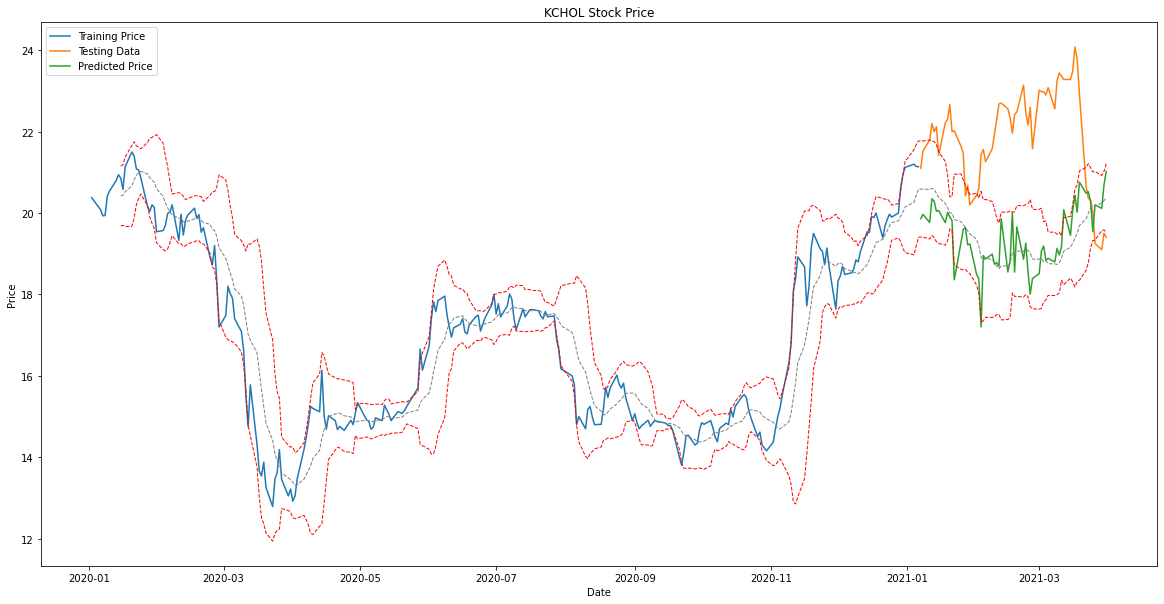

In [108]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KCHOL Stock Price')
plt.legend()
plt.show()

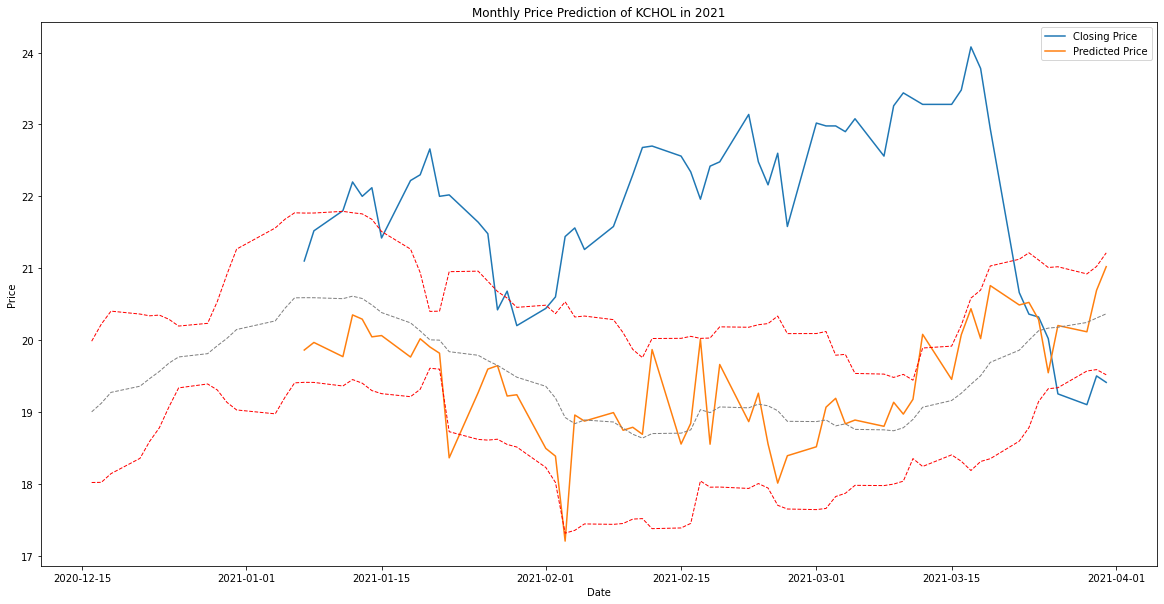

In [109]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of KCHOL in 2021')
plt.legend()
plt.show()